In [1]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import scipy.io as io
import numpy as np

## Read RMS arrays

In [2]:
tr_all = np.load('tr_all.npy')
bg_all = np.load('bg_all.npy')

## Split data for fitting and prediction

In [3]:
# first part is to select model parameter from cleaner samples
X_bg = 20*np.log10(bg_all[:700])
X_tr = 20*np.log10(tr_all[:700])

In [4]:
# second part is to select samples to test the hypothesis of the two distributions
Y_bg = 20*np.log10(bg_all[700:1400])
Y_tr = 20*np.log10(tr_all[700:1400])

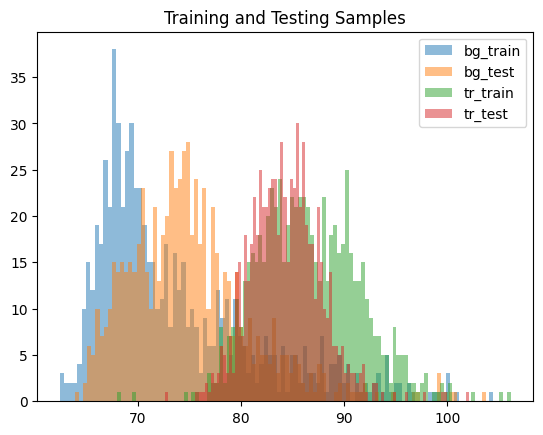

In [5]:
plt.title("Training and Testing Samples")
plt.hist(X_bg, bins=100, alpha=0.5, label='bg_train')
plt.hist(Y_bg, bins=100, alpha=0.5, label='bg_test')
plt.hist(X_tr, bins=100, alpha=0.5, label='tr_train')
plt.hist(Y_tr, bins=100, alpha=0.5, label='tr_test')
plt.legend()

## Fitting Widget

In [6]:
from scipy import stats

In [7]:
import math

In [8]:
# change to X_tr to fit the transmission data
X = X_bg

In [9]:
# sample mean, std, skewness
mean = np.mean(X)
std = np.std(X)
sk = stats.skew(X)

print(mean)
print(std)
print(sk)
sk = min(0.9952717, sk)

73.88372254270536
7.983590609765194
1.224434772830531


In [10]:
# formulas to estimate location, scale, ashape from sample moments
delta = math.copysign(1,sk)*math.sqrt(math.pi/2*pow(sk,2/3)/(pow((4-math.pi)/2,2/3)+pow(sk,2/3)))
print(delta)

shape = delta/math.sqrt(1-delta**2)
scale = std/math.sqrt(1-2*delta**2/math.pi)
location = mean - scale*delta*math.sqrt(2/math.pi)

print(location)
print(scale)
print(shape)

0.9999999943492268
63.31657753450064
13.243952304684463
9406.565024959626


In [11]:
# setting to smaller value of shape
shape = min(20, shape)

In [12]:
def plot_skewnorm_density_L(a, scale, loc):
  h = plt.hist(X, bins=100, density=True, alpha=0.5)

  # evaluate the function at the histogram bins
  skewnorm_density = stats.skewnorm.pdf(h[1], a=a, scale=scale, loc=loc)

  # evaluation the function at the observations
  skewnorm_likelihood = stats.skewnorm.pdf(X, a=a, scale=scale, loc=loc)
  L = np.sum(np.log(skewnorm_likelihood))

  plt.plot(h[1], skewnorm_density)
  plt.title(f"Log-Likelihood {L:.10f}")

In [13]:
# currently using skewnormal, but could explore other distributions

def plot_rice_density_L(a, scale, loc):
  h = plt.hist(X, bins=100, density=True, alpha=0.5)

  # evaluate the function at the histogram bins
  skewnorm_density = stats.rice.pdf(h[1], b=a, scale=scale, loc=loc)

  # evaluation the function at the observations
  skewnorm_likelihood = stats.rice.pdf(X, b=a, scale=scale, loc=loc)
  L = np.sum(np.log(skewnorm_likelihood))

  plt.plot(h[1], skewnorm_density)
  plt.title(f"Log-Likelihood {L:.10f}")

In [14]:
from ipywidgets import interact
import ipywidgets as widgets

import matplotlib.pyplot as plt

In [15]:
shape_slider = widgets.FloatSlider(
    value=shape,
    min=shape-10,
    max=shape+10,
    step=0.01,
    description='Shape:',
    #disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

In [16]:
scale_slider = widgets.FloatSlider(
    value=scale,
    min=scale-10,
    max=scale+10,
    step=0.01,
    description='Scale:',
    #disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

In [17]:
loc_slider = widgets.FloatSlider(
    value=location,
    min=location-10,
    max=location+10,
    step=0.01,
    description='Location:',
    # disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)


In [18]:
out = interact(plot_skewnorm_density_L, a = shape_slider, scale = scale_slider, loc = loc_slider)

interactive(children=(FloatSlider(value=20.0, description='Shape:', max=30.0, min=10.0, readout_format='.1f', …